<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Sesiones/Sesion_16_Reduccion_Dimensionalidad_PCA_Perm_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt

# Reduccion de dimensionalidad

In [2]:
# Ejemplo de data set sintetico con variables aleatorias y variables relacionadas
n = 100
# variable causal con ruido gausiano pequeño
x1 = np.linspace(-1, 1,n) + np.random.RandomState().normal(0, 0.05, n)
# variable causal con un ruido grande uniforme
x2 = np.linspace(-1, 1,n) + np.random.RandomState().uniform(-0.5, 0.5, n)
# variable pura aleatoria gausiana
x3 = np.random.RandomState().normal(0, 1, n)
#variable pura aleatoria uniforme
x4 =  np.random.RandomState().uniform(0, 1, n)
#target y=5x+ruido
y = np.array([0] * (n // 2) + [1] * (n // 2))
#y =5*np.linspace(-1, 1,n) + np.random.RandomState().normal(0, 0.1, n)

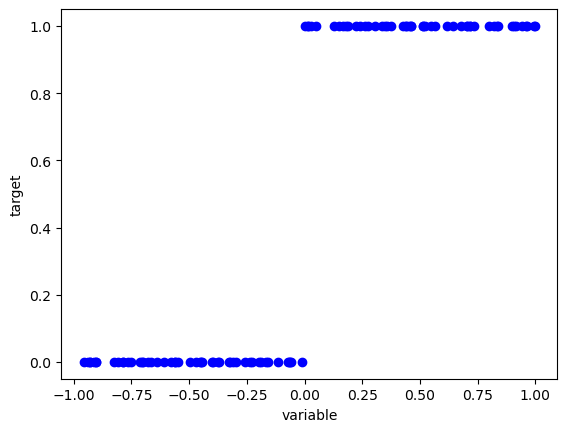

In [3]:
#verifiquen como se ve la relacion entre cada x y el target y
#print(x4,y)
plt.figure()
plt.plot(x1, y,"bo")
plt.xlabel("variable")
plt.ylabel("target")
plt.show()

## Permutation Test para clasificadores
https://www.jmlr.org/papers/volume11/ojala10a/ojala10a.pdf

Este test nos permite encontrar variables que estan muy poco correlacionadas con la variable objetivo. Se basa en un test combinatorio por lo cual a pesar de ser un test riguroso es dificil de aplicar a datasets muy grandes.


In [4]:
from sklearn.model_selection import permutation_test_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [5]:
#reshape for the test
x1_perm = x1.reshape(-1,1)
x2_perm = x2.reshape(-1,1)
x3_perm = x3.reshape(-1,1)
x4_perm = x4.reshape(-1,1)

In [6]:
def permutation_test(x,y):
    estimator = LogisticRegression()
    score, permutation_scores, pvalue = permutation_test_score(

    estimator, x, y, random_state=0
    )
    print(f"Original Score: {score:.3f}")
    print(
        f"Permutation Scores: {permutation_scores.mean():.3f} +/- "
        f"{permutation_scores.std():.3f}"
        )
    print(f"P-value: {pvalue:.3f}")
    return None

In [7]:
print("X1")
permutation_test(x1_perm,y)

print("X2")
permutation_test(x2_perm,y)

print("X3")
permutation_test(x3_perm,y)

print("X4")
permutation_test(x4_perm,y)



X1
Original Score: 0.900
Permutation Scores: 0.524 +/- 0.035
P-value: 0.010
X2
Original Score: 0.840
Permutation Scores: 0.515 +/- 0.033
P-value: 0.010
X3
Original Score: 0.530
Permutation Scores: 0.498 +/- 0.068
P-value: 0.376
X4
Original Score: 0.560
Permutation Scores: 0.495 +/- 0.068
P-value: 0.188


The p-value represents the fraction of randomized data sets where the estimator performed as well or better than in the original data. A small p-value suggests that there is a real dependency between features and targets which has been used by the estimator to give good predictions. A large p-value may be due to lack of real dependency between features and targets or the estimator was not able to use the dependency to give good predictions.

Basados en el bajo valor p de x1 y x2 versus el alto valor p de x3 y x4 podemos reducir el numero de variables a x1 y x2

## Principal Component Analysis PCA

El análisis de componentes principales (PCA) es una técnica estadística que se utiliza para reducir la dimensionalidad de un conjunto de datos, es decir, para representar los datos con menos variables sin perder mucha información. El PCA busca las combinaciones lineales de las variables originales que capturan la mayor parte de la variación o la dispersión de los datos. Estas combinaciones se llaman componentes principales, y se ordenan de mayor a menor importancia. El PCA se puede usar para explorar la estructura de los datos, para visualizarlos en un espacio de baja dimensión, o para prepararlos para otros análisis como la regresión o la clasificación.

Para entender mejor el PCA, puedes consultar la sección 3.2.1 y el apendice A de https://arxiv.org/pdf/2204.04198



In [8]:
#Datos centrados en cero
x1 = np.linspace(-1, 1,10)
x2 = np.linspace(-1, 1,10) + (2*np.random.random(10)-1)

In [9]:
print(x1.mean())
x1 = x1 - x1.mean()
print(x1.mean())

-2.2204460492503132e-17
-2.2204460492503132e-17


In [10]:
print(x2.mean())
x2 = x2 - x2.mean()
print(x2.mean())

-0.08676942719672638
4.4408920985006264e-17


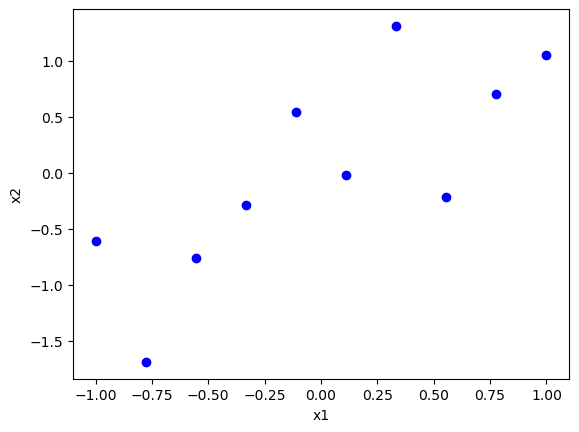

In [11]:
plt.figure()
plt.plot(x1, x2,"bo")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [12]:
np.stack?

Signature:       np.stack(arrays, axis=0, out=None, *, dtype=None, casting='same_kind')
Call signature:  np.stack(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function stack at 0x116ee7920>
File:            ~/miniforge3/envs/python-ml/lib/python3.12/site-packages/numpy/core/shape_base.py
Docstring:      
Join a sequence of arrays along a new axis.

The ``axis`` parameter specifies the index of the new axis in the
dimensions of the result. For example, if ``axis=0`` it will be the first
dimension and if ``axis=-1`` it will be the last dimension.

.. versionadded:: 1.10.0

Parameters
----------
arrays : sequence of array_like
    Each array must have the same shape.

axis : int, optional
    The axis in the result array along which the input arrays are stacked.

out : ndarray, optional
    If provided, the destination to place the result. The shape must be
    correct, matching that of what stack would have returned if no
    out argument were specified.



In [13]:
X = np.stack((x1, x2), axis = 0)
X

array([[-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
         0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ],
       [-0.61109405, -1.68976988, -0.7639162 , -0.28631203,  0.53834717,
        -0.02426071,  1.30870123, -0.22205652,  0.70481777,  1.04554322]])

In [14]:
A = np.cov(X)
A

array([[0.4526749 , 0.4765874 ],
       [0.4765874 , 0.83740486]])

In [15]:
M = np.matrix(A)
M

matrix([[0.4526749 , 0.4765874 ],
        [0.4765874 , 0.83740486]])

In [16]:
# Autovalores y autovectores
E,U = np.linalg.eig(M)

In [17]:
U

matrix([[-0.82894231, -0.5593341 ],
        [ 0.5593341 , -0.82894231]])

In [18]:
U1 = np.array(U[:,0])
U2 = np.array(U[:,1])

In [19]:
U2

array([[-0.5593341 ],
       [-0.82894231]])

In [20]:
E

array([0.13109452, 1.15898524])

In [21]:
#comparar a M
#r = (np.matrix(X) @ np.matrix(X).T) /10

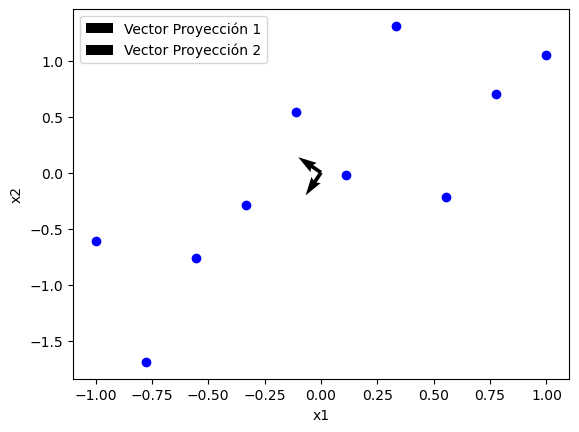

In [22]:
plt.figure()
plt.plot(x1, x2,"bo")
plt.quiver(0,0,U1[0][0],U1[1][0], label = "Vector Proyección 1")
plt.quiver(0,0,U2[0][0],U2[1][0], label = "Vector Proyección 2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [23]:
#Proyectamos los datos X en el subespacio reducido de manera que queda una sola variable P
P = U2.T@X
P

array([[ 1.06589582,  1.83575939,  0.94398363,  0.42378086, -0.38411052,
        -0.04203751, -1.27128253, -0.12666912, -1.01929091, -1.42602912]])

In [24]:
U2[1][0]

-0.828942314492758

In [25]:
# Pendiente
m = np.arctan(U2[1][0]/U2[0][0])
m

0.9772140534243023

In [26]:
x2r = x1*np.tan(m)

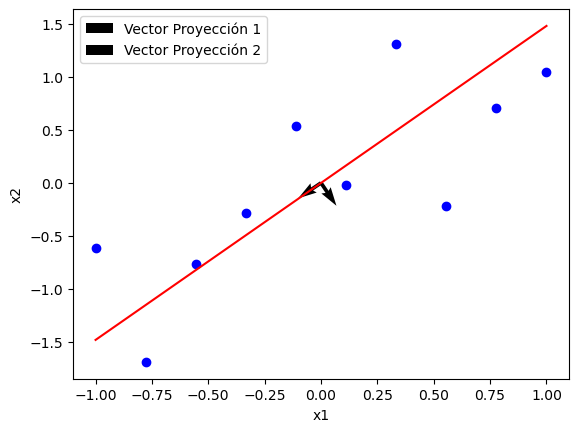

In [27]:
plt.figure()
plt.plot(x1, x2,"bo")
plt.quiver(0,0,U1[1][0],U1[0][0], label = "Vector Proyección 1")
plt.quiver(0,0,U2[1][0],U2[0][0], label = "Vector Proyección 2")
plt.plot(x1, x2r,"r-")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


Observamos que los datos tienen la mayor varianza posible sobre la proyección del primer vector. Esta es una propiedad algebraica que se puede aprovechar para decidir quedarse con los datos proyectados sobre un subespacio mas pequeño que el original con una varianza mayor a ciertdo valor treshold.

El algoritmo quedaría de esta manera (tomado de la referencia indicada arriba):

Algoritmo: Principal component analysis (PCA)

Requiere: Hyperparametro k (la dimensionalidad de los datos proyectados)
En el ejemplo anterior de dos dimensiones que se pueden reducir a una dimension escogeriamos k=1.

Requiere: Matriz X ∈ Rn×m
En el ejemplo anterior de los datos m=2 variables con cada una n=10 records  

Paso 1: En este paso quitamos de manera que cada variable esta centrada en cero.
X ← X − mean(X)

Paso 2: Construimos la matriz de covarianza empírica Σ a partir de XᵀX/n

Paso 3: Calculamos los vectores propios y los ordenamos por el valor de mayor a menor de sus valores propios
V ← Eigenvectors(Σ) 

Paso 4: Construimos la matriz V˜ para hacer la proyección en el espacio reducido de los primeros k-vectores propios
V˜ ← V [:, : k] 

Paso 5: Proyectamos los datos X en el espacio reducido para retornar X˜
X˜ ← X V˜ ∈ Rn×k

In [29]:
#Usando PCA en sklearn

from sklearn.decomposition import PCA

# Combinar en una matriz (10 muestras x 2 variables)
X = np.column_stack((x1, x2))

# Crear el modelo PCA para reducir a 1 componente
pca = PCA(n_components=1)

# Ajustar PCA y transformar los datos
X_pca = pca.fit_transform(X)

print("Datos originales:\n", X)
print("\nDatos transformados (1 componente principal):\n", X_pca)

# Información adicional
print("\nVarianza explicada:", pca.explained_variance_ratio_)
print("Componentes principales:\n", pca.components_)

Datos originales:
 [[-1.         -0.61109405]
 [-0.77777778 -1.68976988]
 [-0.55555556 -0.7639162 ]
 [-0.33333333 -0.28631203]
 [-0.11111111  0.53834717]
 [ 0.11111111 -0.02426071]
 [ 0.33333333  1.30870123]
 [ 0.55555556 -0.22205652]
 [ 0.77777778  0.70481777]
 [ 1.          1.04554322]]

Datos transformados (1 componente principal):
 [[-1.06589582]
 [-1.83575939]
 [-0.94398363]
 [-0.42378086]
 [ 0.38411052]
 [ 0.04203751]
 [ 1.27128253]
 [ 0.12666912]
 [ 1.01929091]
 [ 1.42602912]]

Varianza explicada: [0.89838263]
Componentes principales:
 [[0.5593341  0.82894231]]


## Otras opciones en sklearn


Ver la sección Feature selection en sklearn